In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
df = pd.read_excel('finalData.xlsx')

In [3]:
df.shape

(53044, 2)

In [4]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [5]:
df.tail()

,text,label
53039,Nobody takes me seriously Iâ€™ve (24M) dealt w...,1.0
53040,"selfishness ""I don't feel very good, it's lik...",1.0
53041,Is there any way to sleep better? I can't slee...,1.0
53042,"Public speaking tips? Hi, all. I have to give ...",1.0
53043,I have really bad door 1! It's not about being...,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53044 entries, 0 to 53043
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    52664 non-null  object 
 1   label   53042 non-null  float64
dtypes: float64(1), object(1)
memory usage: 828.9+ KB


In [7]:
df.isnull().sum()

text     380
label      2
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(52663, 2)

shuffling the dataset 

In [10]:
df = df.sample(frac = 1)

Preprocessing Text

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Admin\AppData\Local\Temp\ipykernel_20212\1989676234.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20212\1989676234.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20212\1989676234.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


Contraction Mapping

In [14]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [15]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [16]:
df['cleaned'] = df["text"].apply(text_cleaner)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20212\57854106.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


Visualizing WordCloud

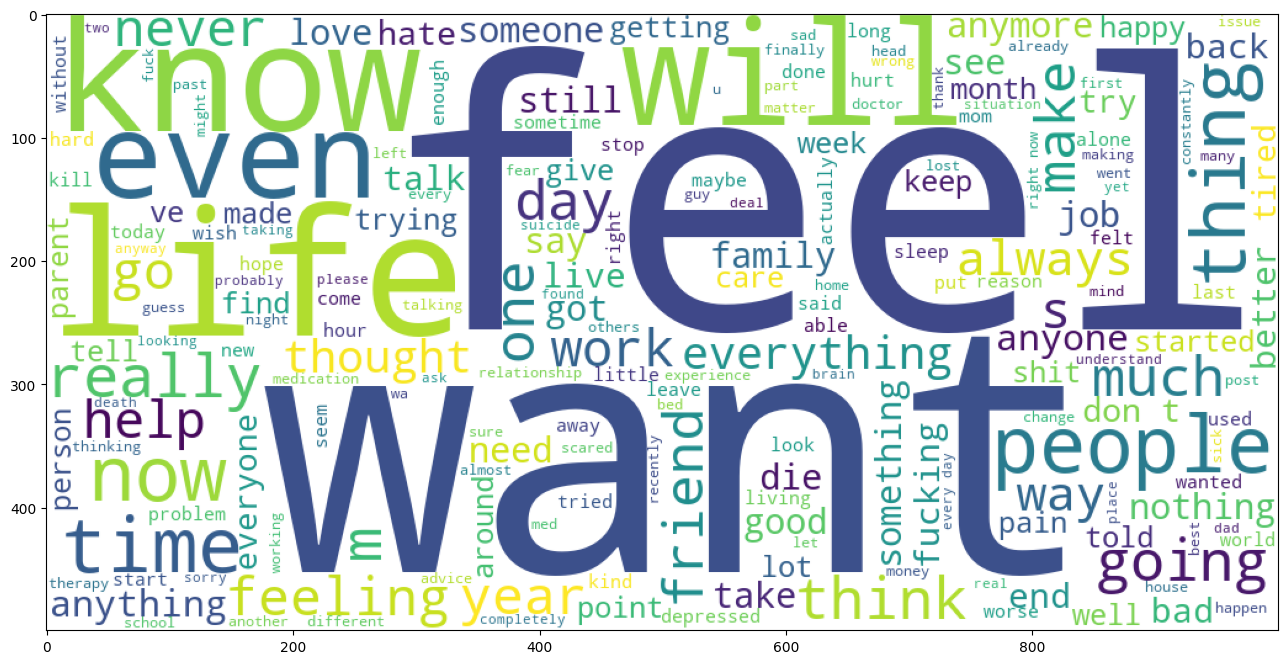

In [17]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned'].head(2000):
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [18]:
df.tail()

,text,label,cleaned
45173,doesnt know what to wear,0.0,doesnt know what to wear
8188,Hoping for some sort of logical reason why I s...,1.0,hoping for some sort of logical reason why i s...
38608,for year now i ve always thought of suicide a ...,1.0,for year now i ve always thought of suicide a ...
29200,Until just a bit before I decide to move to th...,0.0,until just a bit before i decide to move to th...
22098,I am so fucking sick of being lonely i sit alo...,1.0,i am so fucking sick of being lonely i sit alo...


Feature Extraction with CountVectorizer

In [19]:
X = df.cleaned
y = df.label

In [20]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [21]:
X_cv =vect.fit_transform(X).toarray()

In [22]:
X_cv.shape

(52663, 20000)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

Model Performance Evaluation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [51]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
    
    return accuracy

In [52]:
model_names = []
accuracies = []

Logistic Regression

Accuracy : 0.9429412323174784

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      3268
         1.0       0.97      0.95      0.96      7265

    accuracy                           0.94     10533
   macro avg       0.93      0.94      0.93     10533
weighted avg       0.94      0.94      0.94     10533

   ------------ Confusion Matrix -------------- 


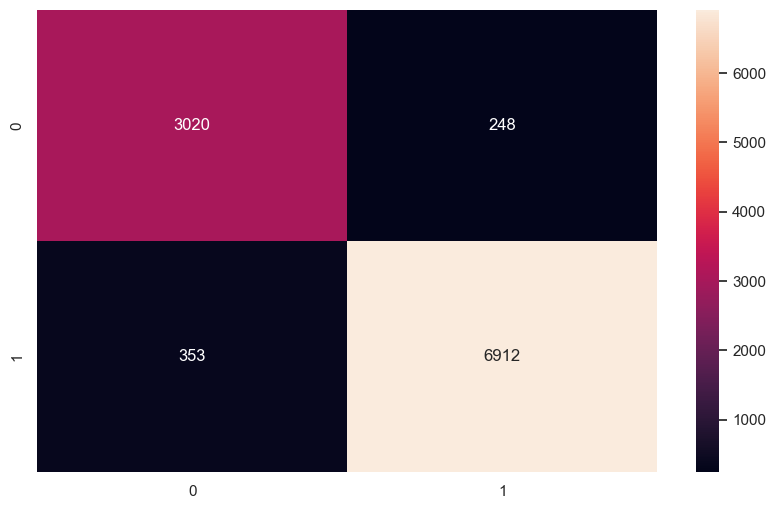

In [53]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
accuracy_lr = performance_eval(clf_lr,X_test)
model_names.append("Logistic Regression")
accuracies.append(accuracy_lr)

Naive Bayes

Accuracy : 0.8540776606854648

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76      3268
         1.0       0.88      0.91      0.90      7265

    accuracy                           0.85     10533
   macro avg       0.83      0.82      0.83     10533
weighted avg       0.85      0.85      0.85     10533

   ------------ Confusion Matrix -------------- 


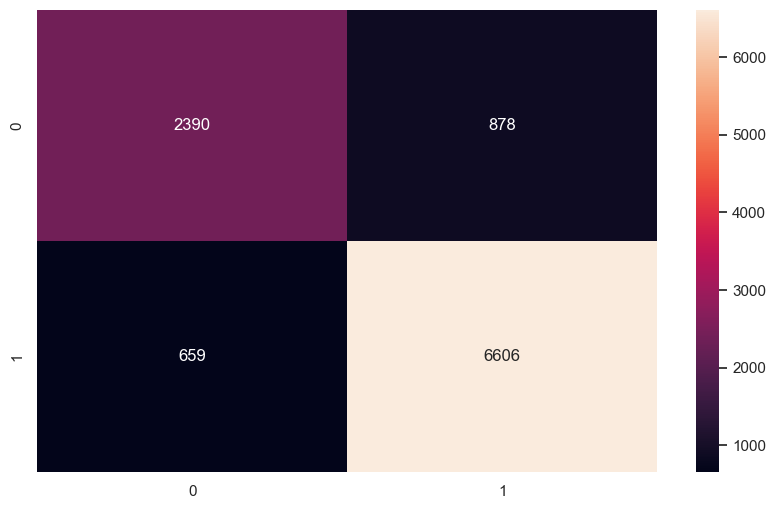

In [54]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
accuracy_nb = performance_eval(clf_nb,X_test)
model_names.append("Naive Bayes")
accuracies.append(accuracy_nb)

Decision Tree

Accuracy : 0.8895851134529573

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      3268
         1.0       0.92      0.92      0.92      7265

    accuracy                           0.89     10533
   macro avg       0.87      0.87      0.87     10533
weighted avg       0.89      0.89      0.89     10533

   ------------ Confusion Matrix -------------- 


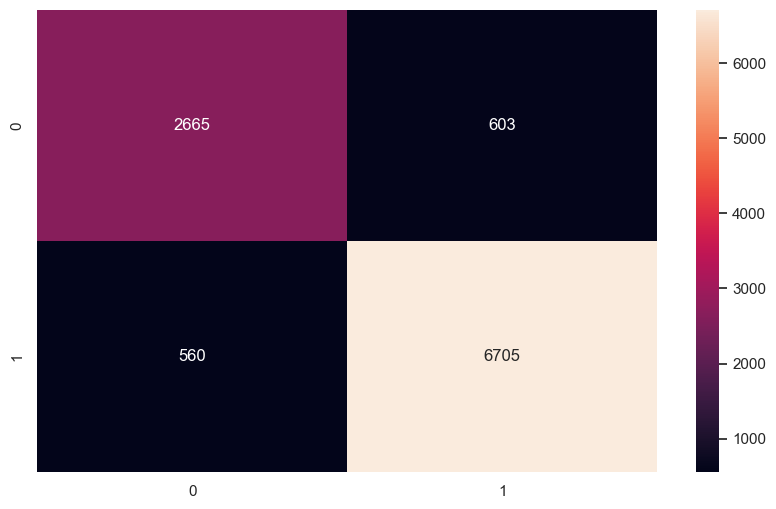

In [55]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
accuracy_dt = performance_eval(clf_dt,X_test)
model_names.append("Decision Tree")
accuracies.append(accuracy_dt)

KNeighborsClassifier

Accuracy : 0.7163201367131872

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.52      0.99      0.68      3268
         1.0       0.99      0.60      0.74      7265

    accuracy                           0.72     10533
   macro avg       0.76      0.79      0.71     10533
weighted avg       0.84      0.72      0.72     10533

   ------------ Confusion Matrix -------------- 


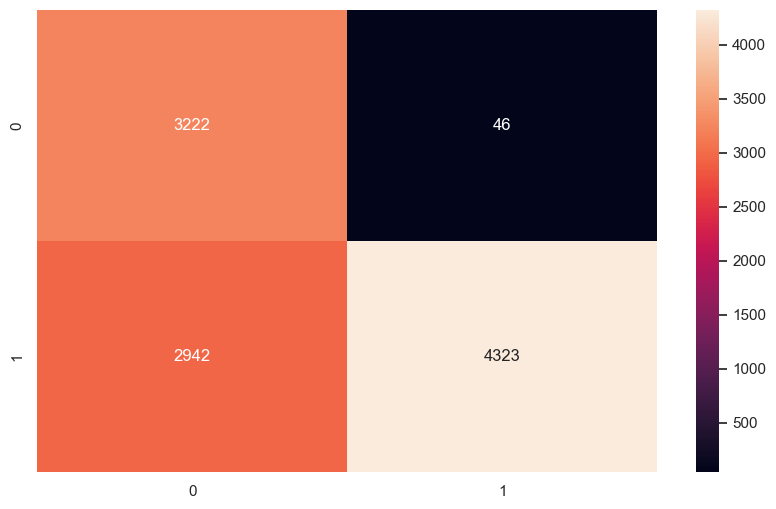

In [56]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
accuracy_knn = performance_eval(clf_knn,X_test)
model_names.append("KNN")
accuracies.append(accuracy_knn)

Random Forest

Accuracy : 0.929364853318143

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      3268
         1.0       0.95      0.95      0.95      7265

    accuracy                           0.93     10533
   macro avg       0.92      0.92      0.92     10533
weighted avg       0.93      0.93      0.93     10533

   ------------ Confusion Matrix -------------- 


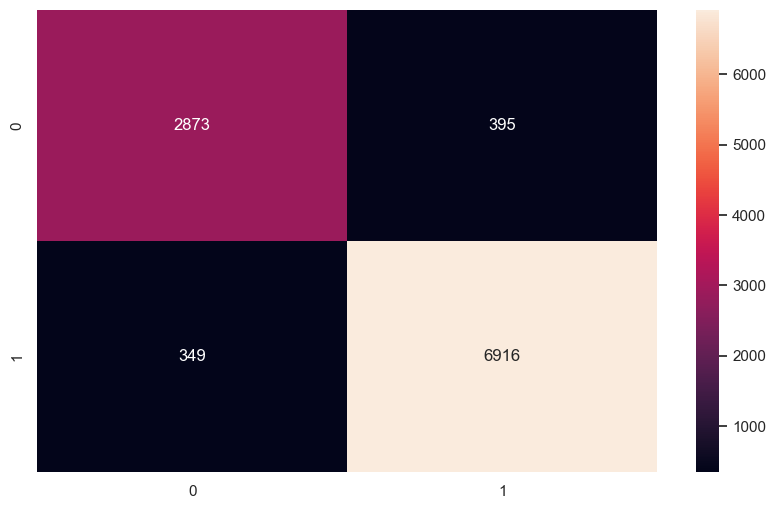

In [57]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
accuracy_rf = performance_eval(clf_rf,X_test)
model_names.append("Random Forest")
accuracies.append(accuracy_rf)

Ensemble

Accuracy : 0.9405677394854267

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      3268
         1.0       0.97      0.94      0.96      7265

    accuracy                           0.94     10533
   macro avg       0.93      0.94      0.93     10533
weighted avg       0.94      0.94      0.94     10533

   ------------ Confusion Matrix -------------- 


0.9405677394854267

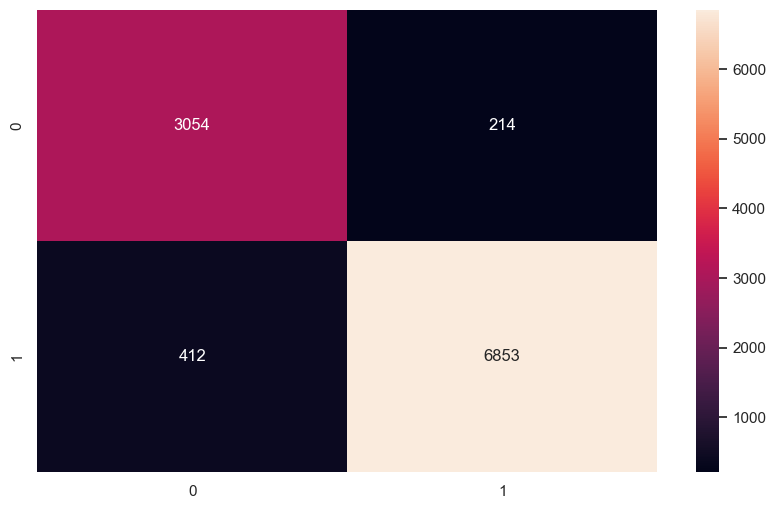

In [58]:
voting_clf = VotingClassifier(estimators=[
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

Saving the Best Model

In [59]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))
pickle.dump(vect,open('vectorizer.pkl','wb'))

Checking for User Input

In [61]:
text = "I am / exhauted :) and restless."

In [62]:
clean_text = text_cleaner(text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20212\57854106.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


In [63]:
clean_text

'i am   exhauted    and restless '

In [64]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [65]:
output = {0:"fit",
          1:"UnFit"}
print(output[single_prediction])

UnFit


['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'KNN', 'Random Forest']
[0.9429412323174784, 0.8540776606854648, 0.8895851134529573, 0.7163201367131872, 0.929364853318143]


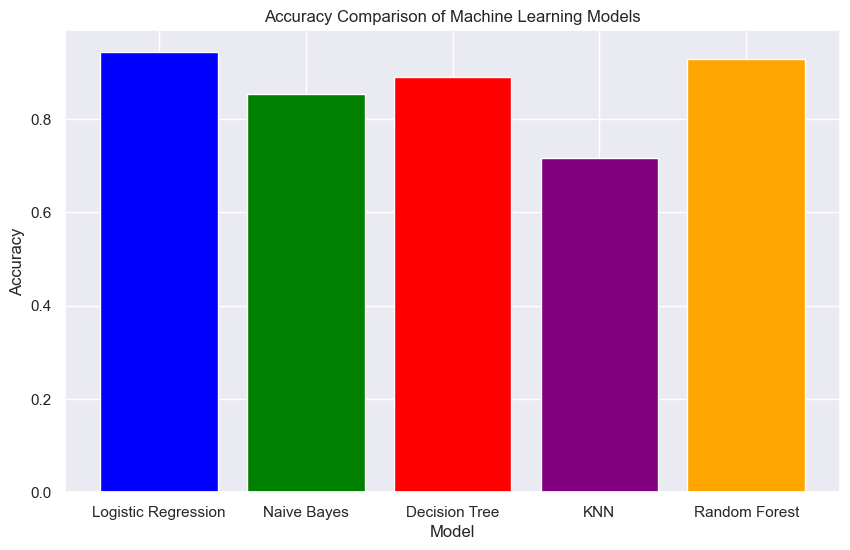

In [66]:
print(model_names)
print(accuracies)

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Accuracy Comparison of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()